In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.lines import Line2D
import cmb_anomaly_utils as cau

plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('legend', facecolor='white', edgecolor='k', framealpha=1)
plt.rcParams['xtick.major.size'] = 3.5
plt.rcParams['ytick.major.size'] = 3.5
plt.rcParams['xtick.labelsize']  = 12
plt.rcParams['ytick.labelsize']  = 12

def custom_save_fig(fig, **kwargs):
    mask_txt = 'masked' if kwargs['is_masked'] else'inpainted'
    fdir     = './output/plots/{}/{}/'.format(mask_txt, kwargs['geom_flag'].lower())
    fdir     = cau.output.ensure_path(fdir)
    fpath    = fdir + '{}_{}_{}_{}_mac'.format(
        mask_txt.lower(),
        kwargs['geom_flag'].lower(),
        kwargs['measure_flag'].lower(),
        kwargs['dir_cap_size'],
    )
    for ftype in ['.png', '.pdf']:
        fig.savefig(fpath + ftype, facecolor=(1,1,1,0), dpi=300, transparent=True)

### $Measures$

0.041


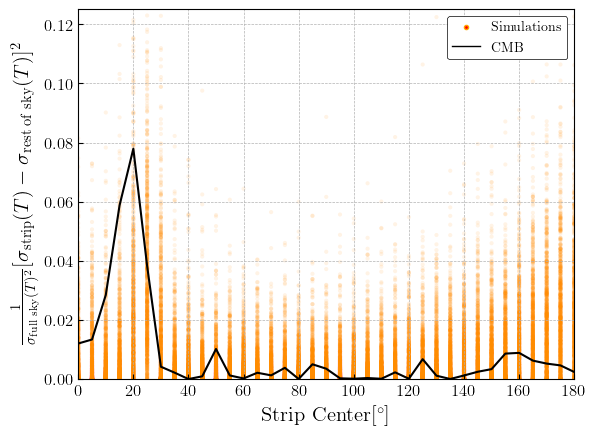

In [40]:
kwargs = {
'base_path':    './output/measure_results_mac_dir/',
'dir_cap_size': 30,
'geom_flag':    cau.const.STRIP_FLAG,
'measure_flag': cau.const.NORM_D_STD2_FLAG,
'is_masked':    False,
'observable':   cau.const.OBS_T,
'tpcf_mode':    cau.const.TPCF_TT,
}
geom_range  = cau.file_reader.read_geom_range_precalc(**kwargs)
cmb_measure = cau.file_reader.read_cmb_precalc(**kwargs)
iter_sims_measure   = cau.file_reader.iter_read_sims_precalc(**kwargs)
screen = np.ones(len(geom_range), dtype=bool)
if kwargs.get('geom_flag') == cau.const.CAP_FLAG:
    screen = (15 <= geom_range) * (geom_range <= 165)

argmax   = np.argmax(cmb_measure[screen])
p_value = 0

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # Simulations
    for sim_measure in iter_sims_measure:
        if sim_measure[screen][argmax] > cmb_measure[screen][argmax]:
            p_value += 1
        ax.scatter(geom_range[screen], sim_measure[screen],
                marker='.', edgecolors='none', linewidths=1, c='darkorange', alpha=.1)
    # CMB
    ax.plot(geom_range[screen], cmb_measure[screen], color='k', linewidth=1.5)
    # Labels
    ax.set_xlabel(cau.output.get_xlabel_tex(**kwargs), size=15)
    ax.set_ylabel(cau.output.get_ylabel_tex(**kwargs), size=15)
    # ax.set_title(cau.output.get_title_tex(**kwargs), y = 1.04)
    # Limits
    if kwargs.get('geom_flag') == cau.const.CAP_FLAG:
        ax.set_xlim(xmin = 15, xmax = 165)
    else:
        ax.set_xlim(xmin = 0, xmax = 180)
    if kwargs.get('measure_flag') in [cau.const.D_STD2_FLAG, cau.const.NORM_D_STD2_FLAG, cau.const.D_CORR2_FLAG]:
        ax.set_ylim(ymin = 0)
    # ax.set_ylim(ymin = 0, ymax = .1250)
    # Legends
    sample_curves = [
        Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
        Line2D([0], [0], ls='-', color='k', lw=1),
        ]
    ax.legend(sample_curves, [r'Simulations', r'CMB'], loc=1)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    # Save fig
    custom_save_fig(fig, **kwargs)

print(p_value / 1000)
plt.show()

### $Internal$  $A_l$

bigger l=7: 121
smaller l=12: 80
weird sims: 16


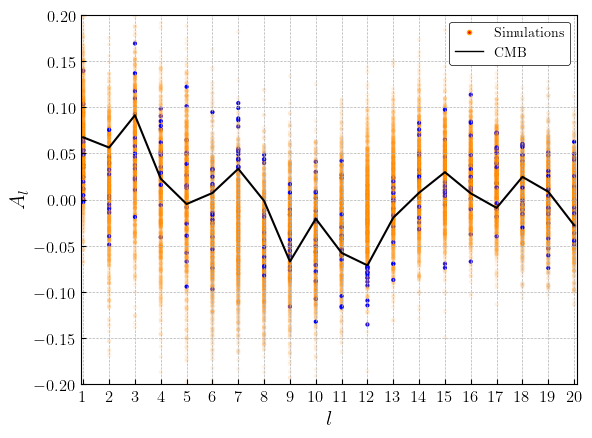

In [20]:
kwargs = {
'base_path':    './output/measure_results_mac_dir/',
'dir_cap_size': 30,
'geom_flag':    cau.const.STRIP_FLAG,
'measure_flag': cau.const.STD_FLAG,
'is_masked':    False,
'observable':   cau.const.OBS_T,
'tpcf_mode':    cau.const.TPCF_TT,
}

plt_mode = 'scatter' #'errorbar' #scatter

cmb_a_l     = cau.file_reader.read_cmb_a_l(**kwargs)
l_range  = np.arange(len(cmb_a_l))
iter_sims_a_l   = cau.file_reader.iter_read_sims_a_l(**kwargs)

n_weird_sim = 0
n_seven = 0
n_twelve = 0

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    if plt_mode == 'scatter':
        # Simulations
        for sim_measure in iter_sims_a_l:
            condition1 = sim_measure[7] > cmb_a_l[7]
            condition2 = sim_measure[12] < cmb_a_l[12]
            if condition1:
                n_seven += 1
            if condition2:
                n_twelve += 1
            if condition1 and condition2:
                n_weird_sim += 1
            ax.scatter(l_range[1:], sim_measure[1:],
                    marker = '.', edgecolors = 'none', linewidths = 1,
                    c = 'blue' if condition1 and condition2 else 'darkorange',
                    alpha = 1 if condition1 and condition2 else .1)
        # CMB
        ax.plot(l_range[1:], cmb_a_l[1:], color='k', linewidth=1.5)
        # Legends
        sample_curves = [
            Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
            Line2D([0], [0], ls='-', color='k', lw=1),
            ]
        ax.legend(sample_curves, [r'Simulations', r'CMB'], loc=1)
    if plt_mode == 'errorbar':
        # Simulations
        sims_a_l = []
        for sim_measure in iter_sims_a_l:
            sims_a_l.append(sim_measure)
            condition1 = sim_measure[7] > cmb_a_l[7]
            condition2 = sim_measure[12] < cmb_a_l[12]
            if condition1:
                n_seven += 1
            if condition2:
                n_twelve += 1
            if condition1 and condition2:
                n_weird_sim += 1
        sims_a_l = np.array(sims_a_l)
        ax.errorbar(l_range[1:], np.mean(sims_a_l, axis=0)[1:], np.std(sims_a_l, axis=0)[1:],
                    color='blue', linewidth=1.5, linestyle='-', label = r'Simulations',
                    ecolor='red', elinewidth=1, capsize = 2)
        # CMB
        ax.plot(l_range[1:], cmb_a_l[1:], color='k', linewidth=1.5, label = r'CMB')
        # Legends
        ax.legend(loc=1)
    # Labels
    ax.set_xlabel(r'$l$', size=15)
    ax.set_ylabel(r'$A_l$', size=15)
    # ax.set_title(r'\boldmath{$A_l$} \textbf{vs.} \boldmath{$l$} for $\sigma_{strip}(T)$', y = 1.04)
    ax.set_facecolor('white')
    # Limits
    ax.set_xlim(xmin = 1 - 0.1, xmax = l_range[-1] + 0.1)
    ax.set_ylim(ymin = - 0.2, ymax = 0.2)
    ax.set_xticks(l_range[1:])
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    # Save fig
    fpath = './output/plots/inpainted/strip/a_l_{}_strip_std_{}mac'.format(
        plt_mode,
        str(int(kwargs['dir_cap_size']))
        )
    fig.savefig(f'{fpath}.pdf', facecolor=(1,1,1,0), dpi=300, transparent=True)
    fig.savefig(f'{fpath}.png', facecolor=(1,1,1,0), dpi=300, transparent=True)

print(f"bigger l=7: {n_seven}")
print(f"smaller l=12: {n_twelve}")
print(f"weird sims: {n_weird_sim}")
plt.show()

### $Modulated$  $A_l$

In [ ]:
kwargs = {
'base_path':    './output/measure_results_mac_dir/',
'dir_cap_size': 30,
'geom_flag':    cau.const.STRIP_FLAG,
'measure_flag': cau.const.STD_FLAG,
'is_masked':    False,
'observable':   cau.const.OBS_T,
'tpcf_mode':    cau.const.TPCF_TT,
}

plt_mode = 'errorbar' #scatter

cmb_a_l  = cau.file_reader.read_cmb_a_l(**kwargs)
l_range  = np.arange(len(cmb_a_l))
sims_a_l = np.loadtxt('./output/sims_modulated_a_l.txt')

n_weird_sim = 0
n_seven = 0
n_twelve = 0

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    if plt_mode == 'scatter':
        # Simulations
        for sim_measure in iter_sims_a_l:
            condition1 = sim_measure[7] > cmb_a_l[7]
            condition2 = sim_measure[12] < cmb_a_l[12]
            if condition1:
                n_seven += 1
            if condition2:
                n_twelve += 1
            if condition1 and condition2:
                n_weird_sim += 1
            ax.scatter(l_range[1:], sim_measure[1:],
                    marker = '.', edgecolors = 'none', linewidths = 1,
                    c = 'red' if condition1 and condition2 else 'darkorange',
                    alpha = 1 if condition1 and condition2 else .1)
        # CMB
        ax.plot(l_range[1:], cmb_a_l[1:], color='k', linewidth=1.5)
        # Legends
        sample_curves = [
            Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
            Line2D([0], [0], ls='-', color='k', lw=1),
            ]
        ax.legend(sample_curves, [r'Simulations', r'CMB'], loc=1)
    if plt_mode == 'errorbar':
        # ax.errorbar(l_range[1:], np.mean(sims_a_l, axis=0)[1:], np.std(sims_a_l, axis=0)[1:],
        ax.errorbar(l_range[1:], cmb_a_l[1:], np.std(sims_a_l, axis=0)[1:],
                    color='black', linewidth=1.5, linestyle='-', label = r'Simulations',
                    ecolor='red', elinewidth=1, capsize = 2)
        # CMB
        # ax.plot(l_range[1:], cmb_a_l[1:], color='k', linewidth=1.5, label = r'CMB')
        # Legends
        # ax.legend(loc=1)
    # Labels
    ax.set_xlabel(r'$l$', size=15)
    ax.set_ylabel(r'$A_l$', size=15)
    # ax.set_title(r'\boldmath{$A_l$} \textbf{vs.} \boldmath{$l$} for $\sigma_{strip}(T)$', y = 1.04)
    ax.set_facecolor('white')
    # Limits
    ax.set_xlim(xmin = 1 - 0.1, xmax = l_range[-1] + 0.1)
    ax.set_ylim(ymin = - 0.15, ymax = 0.16)
    ax.set_xticks(l_range[1:])
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    # Save fig
    fpath = './output/plots/inpainted/strip/a_l_modulated_{}_strip_std_{}mac'.format(
        plt_mode,
        str(int(kwargs['dir_cap_size']))
        )
    fig.savefig(f'{fpath}.pdf', facecolor=(1,1,1,0), dpi=300, transparent=True)
    fig.savefig(f'{fpath}.png', facecolor=(1,1,1,0), dpi=300, transparent=True)

print(f"bigger l=7: {n_seven}")
print(f"smaller l=12: {n_twelve}")
print(f"weird sims: {n_weird_sim}")
plt.show()

for _l, _a_l, _delta_a_l in zip(l_range[1:], cmb_a_l[1:], np.std(sims_a_l, axis=0)[1:]):
    print("l   = {}\na_l = {:.2}\nerr = {:.2}\n".format(_l, _a_l, _delta_a_l))

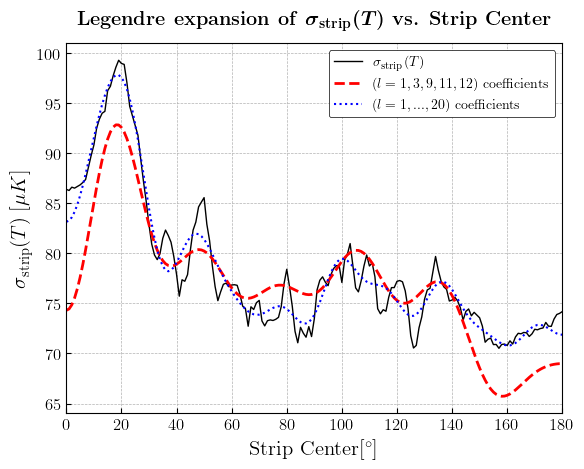

In [22]:
kwargs = {
'base_path':    './output/measure_results_mac_dir/',
'dir_cap_size': 30,
'geom_flag':    cau.const.STRIP_FLAG,
'measure_flag': cau.const.STD_FLAG,
'is_masked':    False,
'observable':   cau.const.OBS_T,
'tpcf_mode':    cau.const.TPCF_TT,
}

plt_mode = 'errorbar' #scatter

cmb_a_l  = cau.file_reader.read_cmb_a_l(**kwargs)
l_range  = np.arange(len(cmb_a_l))
geom_range  = cau.file_reader.read_geom_range_precalc(**kwargs)
cmb_measure = cau.file_reader.read_cmb_precalc(**kwargs)

monopole = np.mean(cmb_measure)

nonzero_a_l = np.zeros(len(cmb_a_l))
nonzero_a_l[0]  = cmb_a_l[0]
nonzero_a_l[1]  = cmb_a_l[1]
nonzero_a_l[3]  = cmb_a_l[3]
nonzero_a_l[9]  = cmb_a_l[9]
nonzero_a_l[11] = cmb_a_l[11]
nonzero_a_l[12] = cmb_a_l[12]

cos_theta = np.cos(np.radians(geom_range))

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # cmb
    ax.plot(geom_range, cmb_measure,
            color='k', linewidth=1)
    # cmb legendre nonzero a_l
    al_pl_nonzero = np.array([nonzero_a_l[l] * cau.math_utils.legendre(l, cos_theta) for l in l_range])
    ax.plot(geom_range, monopole * np.sum(al_pl_nonzero, axis=0),
            color='r',linestyle='--', lw=2)
#     # cmb legendre all a_l
    al_pl_all = np.array([cmb_a_l[l] * cau.math_utils.legendre(l, cos_theta) for l in l_range])
    ax.plot(geom_range, monopole * np.sum(al_pl_all, axis=0),
            linewidth=1.5, color='b',linestyle=':')
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{strip}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\textbf{Legendre expansion of }'+ r'\boldmath{{{}}}'.format(measure_text) + \
                r' \textbf{vs. Strip Center}',
                 y=1.03)
    ax.legend([measure_text,
               r'($l=1, 3, 9, 11, 12$) coefficients',
               r'($l=1, ..., 20$) coefficients'])
    ax.set_facecolor('white')
    # Limits
    ax.set_xlim(xmin = 0, xmax = 180)
#     ax.set_ylim(ymin = - 0.2, ymax = 0.2)
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    # Save fig
    fpath = './output/plots/strip_std_vs_legendre_expansion'
    fig.savefig(f'{fpath}.pdf', facecolor=(1,1,1,0), dpi=300, transparent=True)
    fig.savefig(f'{fpath}.png', facecolor=(1,1,1,0), dpi=300, transparent=True)
plt.show()